In [1]:
import math
import collections
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

import getweather

In [2]:
allyears = np.vstack(
    [
        getweather.getyear("PASADENA", ["TMIN", "TMAX"], year)
        for year in range(1910, 2019)
    ]
)

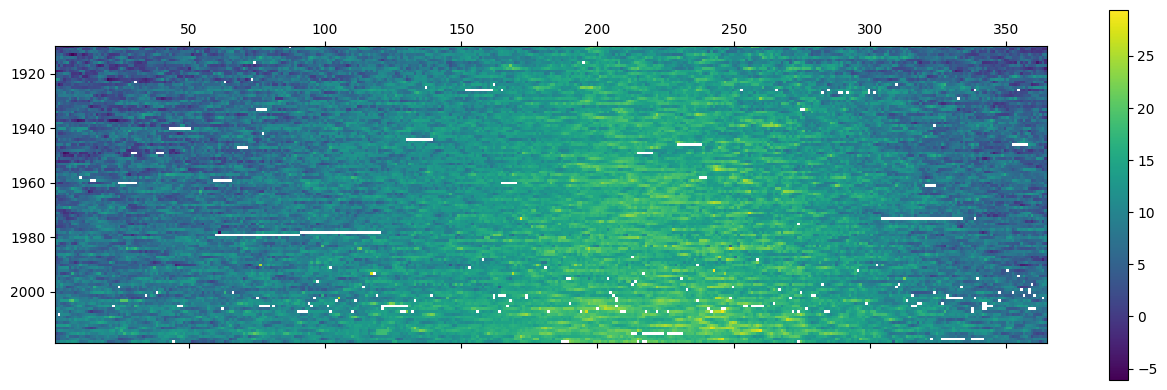

In [3]:
pp.matshow(allyears["TMIN"], extent=[1, 365, 2019, 1910])
pp.colorbar()

In [4]:
tmin_record = np.nanmin(allyears["TMIN"], axis=0)
tmax_record = np.nanmin(allyears["TMAX"], axis=0)

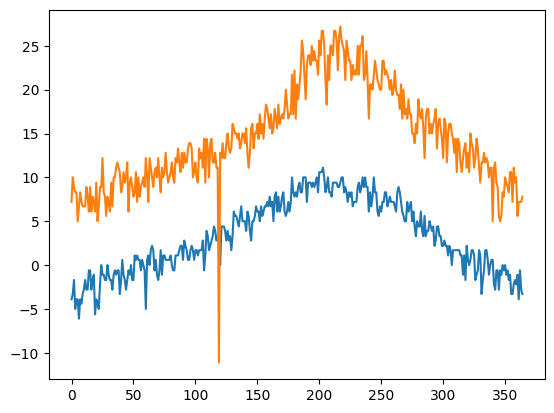

In [5]:
pp.plot(tmin_record)
pp.plot(tmax_record)

In [6]:
normal = np.vstack(
    [
        getweather.getyear("PASADENA", ["TMIN", "TMAX"], year)
        for year in range(1981, 2011)
    ]
)

In [7]:
tmin_normal = np.nanmean(normal["TMIN"], axis=0)
tmax_normal = np.nanmean(normal["TMAX"], axis=0)

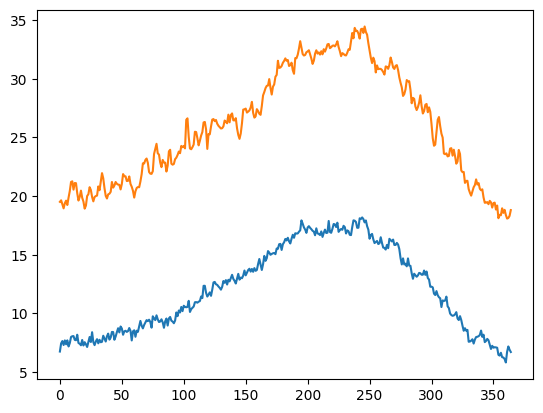

In [8]:
pp.plot(tmin_normal)
pp.plot(tmax_normal)

In [9]:
station, year = "PASADENA", 2018

In [10]:
thisyear = getweather.getyear(station, ["TMIN", "TMAX"], year)

In [11]:
days = np.arange(1, 366)

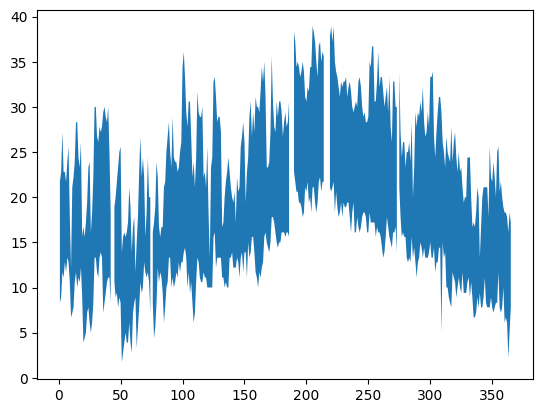

In [12]:
pp.fill_between(days, thisyear["TMIN"], thisyear["TMAX"])

In [13]:
avg = 0.5 * (np.nanmean(thisyear["TMIN"]) + np.nanmean(thisyear["TMAX"]))

In [14]:
f"station {station}, {year}: average temperature = {avg:.2f} C"

'station PASADENA, 2018: average temperature = 19.46 C'

Text(0.5, 1.0, 'station PASADENA, 2018: average temperature = 19.46 C')

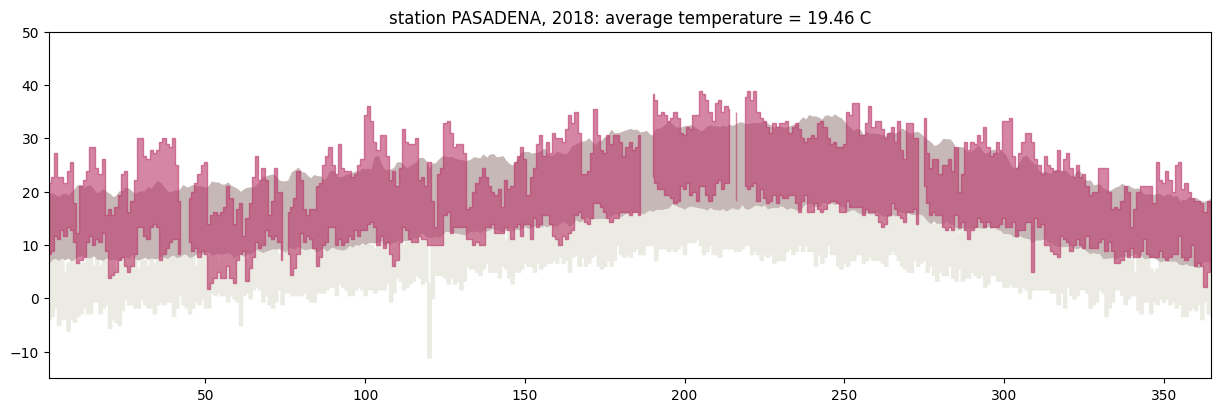

In [15]:
pp.figure(figsize=(15, 4.5))
pp.fill_between(days, tmin_record, tmax_record,
                color=(0.92, 0.92, 0.89), step="mid")
pp.fill_between(days, tmin_normal, tmax_normal, color=(0.78, 0.72, 0.72))

pp.fill_between(
    days,
    thisyear["TMIN"],
    thisyear["TMAX"],
    color=(0.73, 0.21, 0.41),
    alpha=0.6,
    step="mid",
)

pp.axis(xmin=1, xmax=365, ymin=-15, ymax=50)
pp.title(f"station {station}, {year}: average temperature = {avg:.2f} C")

In [16]:
def nyplot(station, year):
    pp.figure(figsize=(15, 4.5))

    allyears = np.vstack(
        [
            getweather.getyear(station, ["TMIN", "TMAX"], year)
            for year in range(1910, 2020)
        ]
    )
    normal = np.vstack(
        [
            getweather.getyear(station, ["TMIN", "TMAX"], year)
            for year in range(1981, 2011)
        ]
    )

    tmin_record, tmax_record = np.nanmin(allyears["TMIN"], axis=0), np.nanmax(
        allyears["TMAX"], axis=0
    )
    tmin_normal, tmax_normal = np.nanmean(normal["TMIN"], axis=0), np.nanmean(
        normal["TMAX"], axis=0
    )

    days = np.arange(1, 366)

    pp.fill_between(
        days, tmin_record, tmax_record, color=(0.92, 0.92, 0.89), step="mid"
    )
    pp.fill_between(days, tmin_normal, tmax_normal, color=(0.78, 0.72, 0.72))

    this_year = getweather.getyear(station, ["TMIN", "TMAX"], year)
    pp.fill_between(
        days,
        this_year["TMIN"],
        this_year["TMAX"],
        color=(0.73, 0.21, 0.41),
        alpha=0.6,
        step="mid",
    )

    pp.axis(xmin=1, xmax=365, ymin=-15, ymax=40)

    avg = 0.5 * (np.nanmean(this_year["TMIN"]) + np.nanmean(this_year["TMAX"]))
    pp.title(f"Station {station}, {year}: average temperature = {avg:.2f} C")

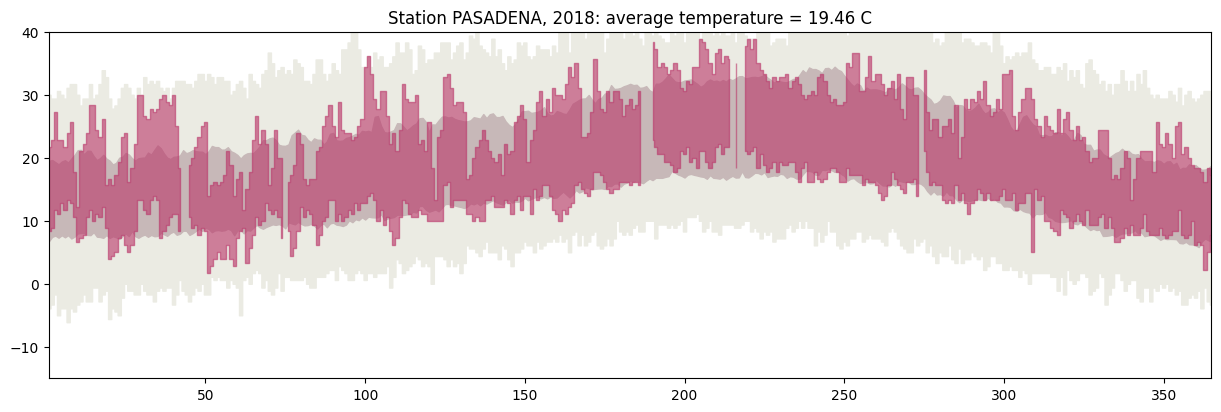

In [19]:
nyplot('PASADENA', 2018)